<a href="https://colab.research.google.com/github/Saaaaaammy/MCAS-x5/blob/main/Transfer%20Function%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control
import sympy as sym
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

A,D,T,s=sym.symbols('A,Delta,Theta,s')




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 2.7 MB/s eta 0:00:00


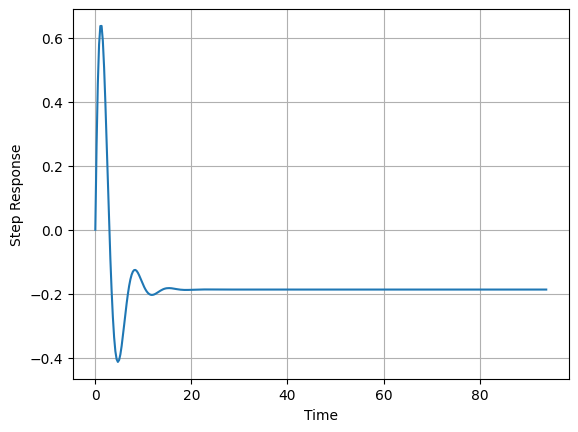

TransferFunction(array([ 1.15101   , -0.17327525]), array([1.     , 0.736  , 0.92586, 0.     ]))

In [2]:
s=ctrl.TransferFunction.s

Theta=1.15101*s-0.17327525
Delta=0.92586*s+0.736*s**2+s**3


G=Theta/Delta



t_imp,x_imp=ctrl.impulse_response(G)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Step Response')
plt.plot(t_imp,x_imp)
plt.show()
G


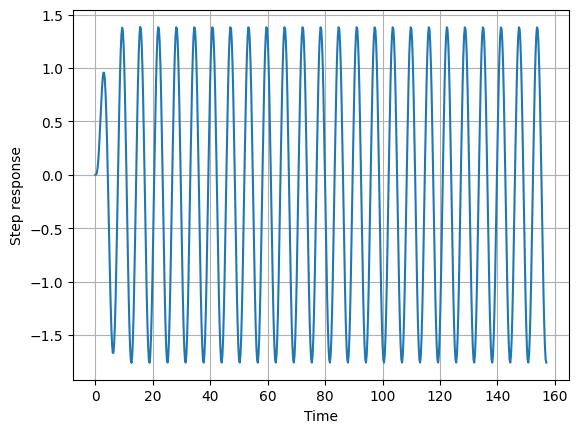

In [3]:
G2=G/(s**2+1)
t_freq,x_freq=ctrl.impulse_response(G2)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Step response')
plt.plot(t_freq,x_freq)
plt.show()

TransferFunction(array([ 1.15101   , -0.17327525,  0.        ]), array([ 1.00000000e+00,  1.22461000e+01,  1.15100919e+06, -2.88376250e+05,
        1.73275250e+04]))

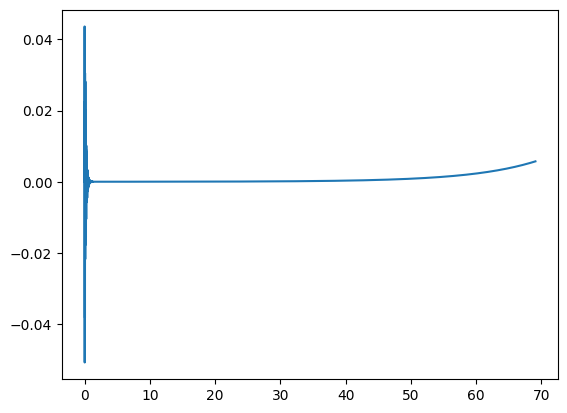

In [4]:
kp=1000000
ki=-100000
kd=10
Gpid=kp+ki/s+kd*s



G_load = ctrl.feedback(G, Gpid, sign=-1)
G_load

t_imp, theta_imp=ctrl.impulse_response(G_load)
plt.plot(t_imp, np.rad2deg(theta_imp))
plt.show


G_load